In [250]:
import sys
import nltk
import sklearn
import pandas
import numpy
import pandas as pd
import numpy as np
import codecs


In [251]:


def Remove_dup_lines(text):

    lines_seen = set() # holds lines already seen
    #outfile = open("out.txt", "w")
    for line in text:
        if line not in lines_seen: # not a duplicate
            #outfile.write(line)
            lines_seen.add(line)
            
    return lines_seen

In [252]:
import os
ham = os.listdir('enron1/ham/')
spam = os.listdir('enron1/spam/')


In [253]:
data = pd.DataFrame(columns=[0,1])
spam_text = pd.DataFrame(columns=[0,1])
ham_text = pd.DataFrame(columns=[0,1])   

for i in range(0,len(spam)):
    #print('enron1/ham/'+ham[i])
    with open('enron1/spam/'+spam[i], 'r', errors='ignore') as f:
        data = data.append({0: "spam",1:(f.read())}, ignore_index=True) 
            
      

In [254]:

x = pd.DataFrame(Remove_dup_lines(data[1]))
x.count()

0    1463
dtype: int64

In [255]:
data.count()

0    1500
1    1500
dtype: int64

In [256]:
for i in range(0,len(ham)):
    #print('enron1/ham/'+ham[i])
    with open('enron1/ham/'+ham[i], 'r', errors='ignore') as f:
        data = data.append({0: "ham",1:(f.read())}, ignore_index=True)  

geting email from spam and ham

In [257]:
spam_text=data[data[0]=='spam']
ham_text=data[data[0]=='ham']

In [258]:
df_spam = pd.DataFrame(spam_text)
df_ham = pd.DataFrame(ham_text)

In [259]:
df_spam.count()


0    1500
1    1500
dtype: int64

In [260]:
df_ham.count()

0    3672
1    3672
dtype: int64

counting words from each email and get average words 

In [261]:
Size_spam_email=[]

for i in spam_text[1]:
    Size_spam_email.append(len(i))
   
pd.DataFrame(Size_spam_email).mean()   

0    1203.629333
dtype: float64

In [262]:
Size_ham_email=[]

for i in ham_text[1]:
    Size_ham_email.append(len(i))
   
pd.DataFrame(Size_ham_email).mean()   

0    959.392974
dtype: float64

spam has more words by email in average

In [594]:
df = pd.DataFrame(data)

In [595]:
from sklearn.utils import shuffle
df = shuffle(df)


In [596]:
df.count()

0    5172
1    5172
dtype: int64

In [597]:
# print useful information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5172 entries, 1188 to 5151
Data columns (total 2 columns):
0    5172 non-null object
1    5172 non-null object
dtypes: object(2)
memory usage: 121.2+ KB
None
         0                                                  1
1188  spam         Subject: get ahead in life with the euro\n
824   spam  Subject: fwd : e b a y - tips , tricks and sec...
161   spam  Subject: re : go entire wknd ! luge\npaliourg ...
4876   ham  Subject: fw : release of deal # 70550\n- - - -...
3514   ham  Subject: neon discussion november 15\nhere are...


In [598]:
# check class distribution
classes = df[0]
print(classes.value_counts())

ham     3672
spam    1500
Name: 0, dtype: int64


### 2. Preprocess the Data

Preprocessing the data is an essential step in natural language process. In the following cells, we will convert our class labels to binary values using the LabelEncoder from sklearn, replace email addresses, URLs, phone numbers, and other symbols by using regular expressions, remove stop words, and extract word stems.  

In [599]:
from sklearn.preprocessing import LabelEncoder

# turn ham and spam in categorical values 0 and 1
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

print(Y[:10])

[1 1 1 0 0 0 1 1 0 0]


In [600]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [601]:
# store the SMS message data
messages = df[1]
print(messages[:10])

1188           Subject: get ahead in life with the euro\n
824     Subject: fwd : e b a y - tips , tricks and sec...
161     Subject: re : go entire wknd ! luge\npaliourg ...
4876    Subject: fw : release of deal # 70550\n- - - -...
3514    Subject: neon discussion november 15\nhere are...
5087    Subject: tenaska iv\ndarren :\ni have some upd...
481                                           Subject: \n
322     Subject: better s . e . x guar . antee . d\n( ...
1864    Subject: nom for 2 / 28 and 2 / 29 - hpl deliv...
4853    Subject: re : noms for 6 / 20 thru 6 / 24 / 01...
Name: 1, dtype: object


In [602]:
import codecs
import re
from math import log
import time
import matplotlib.pyplot as plt
plt.rcdefaults
import numpy as np
PRINT_DEBUG = False

def clean_number(text):   
    for i in range(0,10):
        text = text.str.replace(str(i),'')               
    return text


def clean_string(the_string):
    # TODO try better regex later
    the_clean_string = the_string.str.replace(r"[\;\?\<\>\,\"\|\:\.\`\~\{\}\\\/@$\%\[\]\(\)\^\-\+\&#\*\!\_\=]*", "")
    #the_clean_string = re.sub(r"[@\/\"$%#\[\]{}\^?&\.:!-_\d\{\}]", "", the_clean_string)
    the_clean_string = the_clean_string.str.replace(r'[^\w\d\s]', ' ')
    the_clean_string = the_clean_string.str.replace(r'^\s+|\s+?$', '')
    the_clean_string = the_clean_string.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','')
    the_clean_string = the_clean_string.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','')
    the_clean_string = the_clean_string.str.replace(r'subject','')
    # Remove punctuation
    the_clean_string = the_clean_string.str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    the_clean_string = the_clean_string.str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    the_clean_string = the_clean_string.str.replace(r'^\s+|\s+?$', '')
    
    return the_clean_string

In [603]:
#clean_number(messages[:10].str.lower())

In [604]:

message_cleaned = clean_string(messages.str.lower())
message_cleaned = clean_number(message_cleaned.str.lower())

In [605]:
spam_text = clean_string(spam_text[1].str.lower())
spam_text = clean_number(spam_text.str.lower())

AttributeError: 'str' object has no attribute 'str'

In [ ]:
ham_text = clean_string(ham_text[1].str.lower())
ham_text = clean_number(ham_text.str.lower())

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

message_cleaned = message_cleaned.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))



In [ ]:
spam_text= spam_text.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [ ]:
ham_text= ham_text.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [606]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

message_cleaned = message_cleaned.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [607]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

spam_words = spam_text.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [608]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

ham_words = ham_text.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

### 3. Generating Features

Feature engineering is the process of using domain knowledge of the data to create features for machine learning algorithms. In this project, the words in each text message will be our features.  For this purpose, it will be necessary to tokenize each word.  We will use the 1500 most common words as features.

In [609]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gival\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [610]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in message_cleaned:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [611]:
from nltk.tokenize import word_tokenize

# create bag-of-words
spam_w = []

for message in spam_words:
    Swords = word_tokenize(message)
    for w in Swords:
        spam_w.append(w)
        
spam_words = nltk.FreqDist(spam_w)

In [612]:
from nltk.tokenize import word_tokenize

# create bag-of-words
ham_w = []

for message in ham_words:
    Swords = word_tokenize(message)
    for w in Swords:
        ham_w.append(w)
        
ham_words = nltk.FreqDist(ham_w)

In [613]:
spam_words

FreqDist({'com': 993, 'http': 984, 'compani': 921, 'price': 732, 'e': 631, 'www': 587, 'get': 556, 'inform': 556, 'font': 515, 'email': 514, ...})

In [614]:
ham_words

FreqDist({'ect': 13897, 'hou': 7281, 'enron': 6555, 'deal': 3549, 'ga': 2895, 'pleas': 2737, 'meter': 2718, 'com': 2717, 'cc': 2379, 'pm': 2325, ...})

In [289]:
all_words.most_common(30)

[('ect', 13908),
 ('hou', 7289),
 ('enron', 6555),
 ('com', 3710),
 ('deal', 3655),
 ('pleas', 3245),
 ('ga', 3072),
 ('meter', 2721),
 ('cc', 2391),
 ('pm', 2343),
 ('hpl', 2318),
 ('thank', 2305),
 ('need', 2081),
 ('e', 1969),
 ('daren', 1901),
 ('forward', 1833),
 ('price', 1813),
 ('corp', 1776),
 ('volum', 1691),
 ('know', 1618),
 ('day', 1549),
 ('get', 1504),
 ('new', 1437),
 ('compani', 1432),
 ('mmbtu', 1408),
 ('product', 1403),
 ('may', 1384),
 ('chang', 1354),
 ('j', 1336),
 ('inform', 1296)]

In [290]:
spam_words.most_common(30)

[('com', 993),
 ('http', 984),
 ('compani', 921),
 ('price', 732),
 ('e', 631),
 ('www', 587),
 ('get', 556),
 ('inform', 556),
 ('font', 515),
 ('email', 514),
 ('pleas', 508),
 ('td', 504),
 ('secur', 502),
 ('statement', 497),
 ('invest', 476),
 ('us', 470),
 ('stock', 467),
 ('product', 463),
 ('time', 449),
 ('new', 434),
 ('may', 423),
 ('nbsp', 418),
 ('one', 405),
 ('use', 385),
 ('p', 384),
 ('look', 371),
 ('offer', 366),
 ('height', 363),
 ('pill', 357),
 ('need', 351)]

In [291]:
ham_words.most_common(30)

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('deal', 3549),
 ('ga', 2895),
 ('pleas', 2737),
 ('meter', 2718),
 ('com', 2717),
 ('cc', 2379),
 ('pm', 2325),
 ('hpl', 2318),
 ('thank', 2125),
 ('daren', 1901),
 ('need', 1730),
 ('corp', 1710),
 ('volum', 1668),
 ('forward', 1608),
 ('know', 1458),
 ('mmbtu', 1408),
 ('e', 1338),
 ('j', 1300),
 ('day', 1292),
 ('chang', 1242),
 ('nom', 1185),
 ('attach', 1169),
 ('farmer', 1139),
 ('contract', 1129),
 ('let', 1104),
 ('price', 1081),
 ('xl', 1035)]

In [615]:
df = pd.DataFrame(all_words.most_common(100)) #[10:30]
df=df.sort_values(by=1, ascending=True)

In [616]:
df_spam = pd.DataFrame(spam_words.most_common(100)) #[10:30]
df_spam=df_spam.sort_values(by=1, ascending=True)

In [617]:
df_ham = pd.DataFrame(ham_words.most_common(100)) #[10:30]
df_ham=df_ham.sort_values(by=1, ascending=True)

In [618]:


#intersected_df = pd.merge(df_ham[0], df_spam[0], how='inner')
words=set(df_spam[0]) & set(df_ham[0])

In [774]:
spam_in=[]
ham_in=[]

for i in range(0,len(df_spam[0])):      
    
    if(df_spam[0][i] in words):
        #print(df_spam[0][i])
        #print(list(df_spam.loc[i]))
        spam_in.append(list(df_spam.loc[i]))
        

In [775]:
for i in range(0,len(df_ham[0])):      
    
    if(df_ham[0][i] in words):
        #print(df_ham[0][i])
        #print(list(df_ham.loc[i]))
        ham_in.append(list(df_ham.loc[i]))
        

In [776]:
ham_y = pd.DataFrame(ham_in)

In [777]:
h_y=ham_y.sort_values(by=0, ascending=True)

In [778]:
s_x=spam_y.sort_values(by=0, ascending=True)

In [779]:
spam_y = pd.DataFrame(spam_in)

In [780]:
spam_x = pd.DataFrame(spam_in)

In [781]:
#set(spam_x[0])&set(spam_y[0])

In [785]:
h_y.set_index(0, inplace=True)

In [786]:
s_x.set_index(0, inplace=True)

In [788]:
s_x=s_x.rename(columns={1: "spam"})

In [790]:
h_y=h_y.rename(columns={1: "ham",0:"ind"})

In [791]:
result = pd.concat([h_y, s_x['spam']], axis=1, join='inner')

In [817]:
#result.reset_index(level=0, inplace=True)

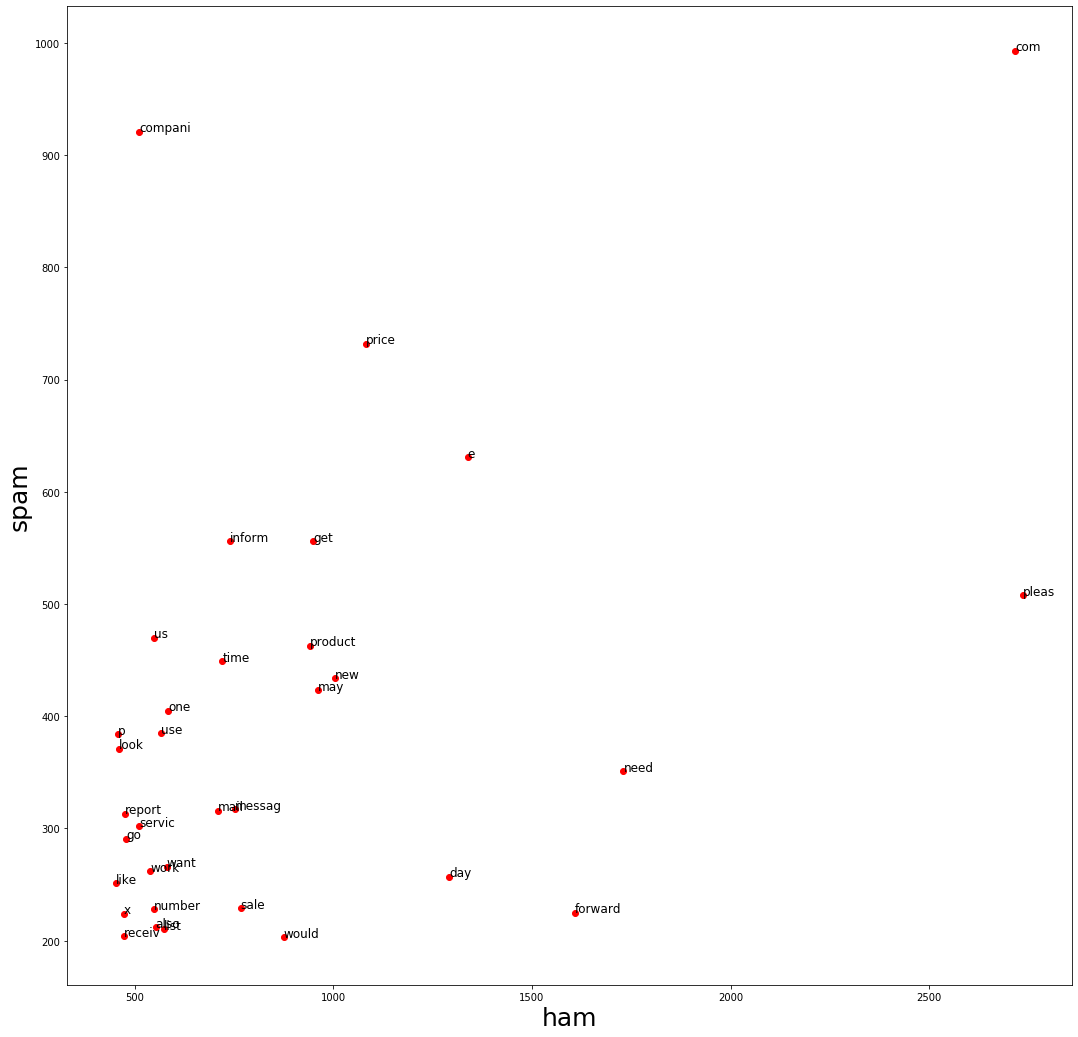

In [834]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(18,18))
# simulating a pandas df['type'] column
types = list(result[0])
x_coords = list(result['ham'])
y_coords = list(result['spam'])

plt.xlabel('ham', fontsize=25)
plt.ylabel('spam', fontsize=25)
 
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=12)
plt.show()

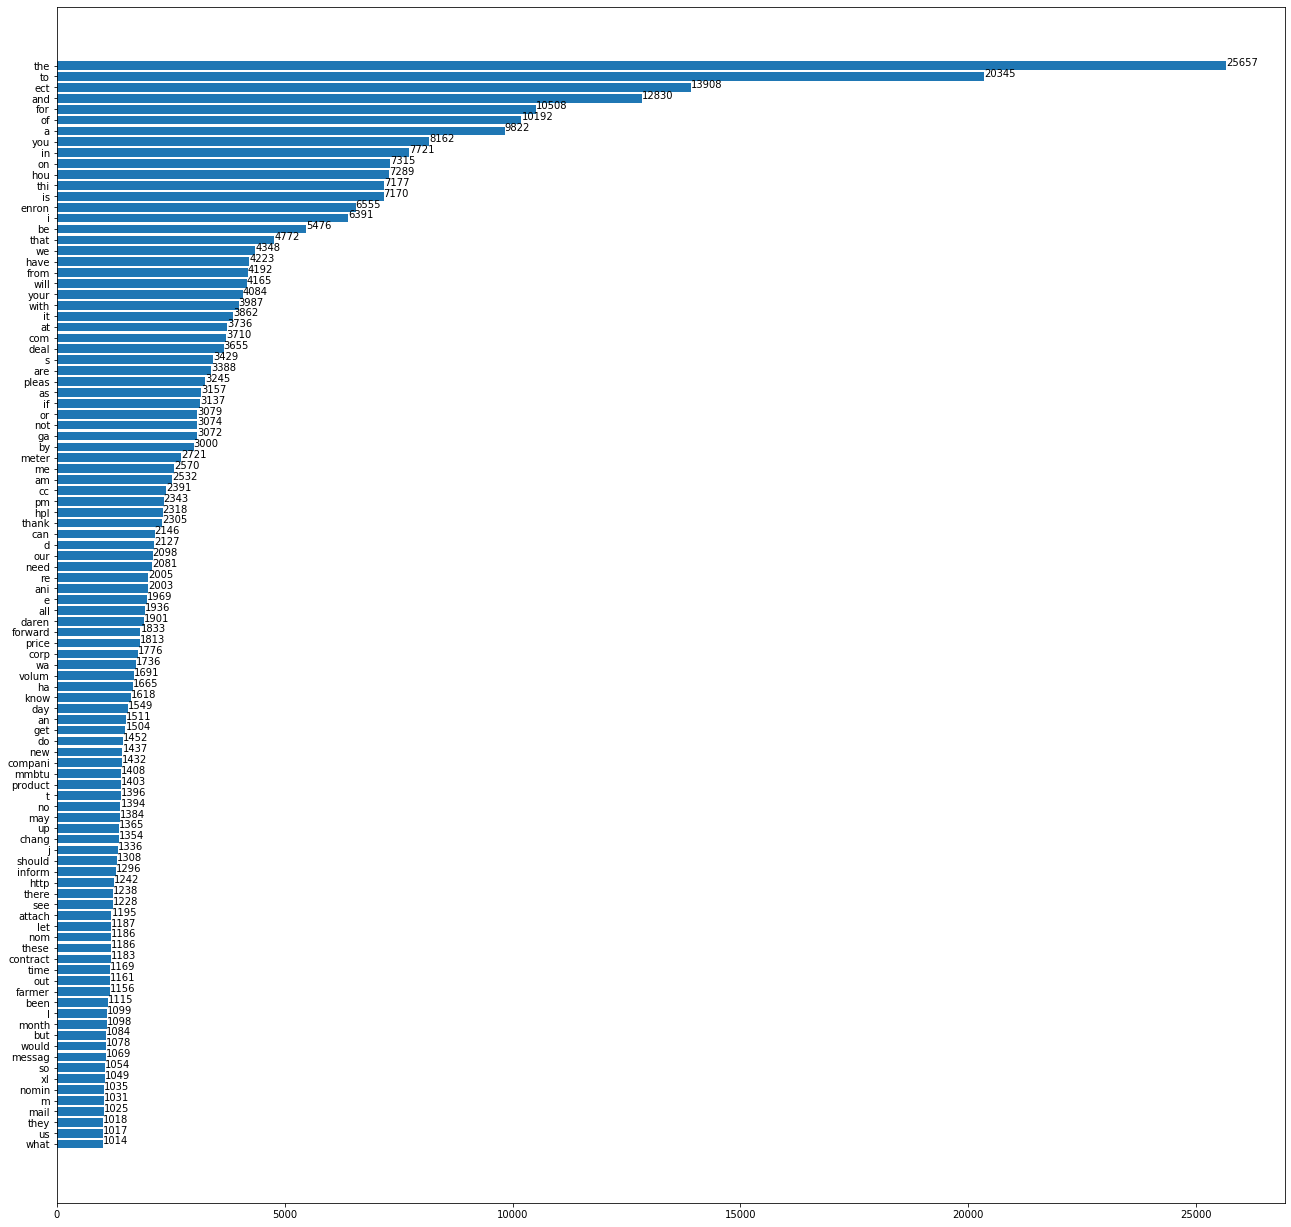

In [842]:
plt.subplots(figsize=(22,22))
x = list(df[0])
y = list(df[1])
plt.barh(x, y)


for index, value in enumerate(y):
    plt.text(value, index, str(value))

<BarContainer object of 100 artists>

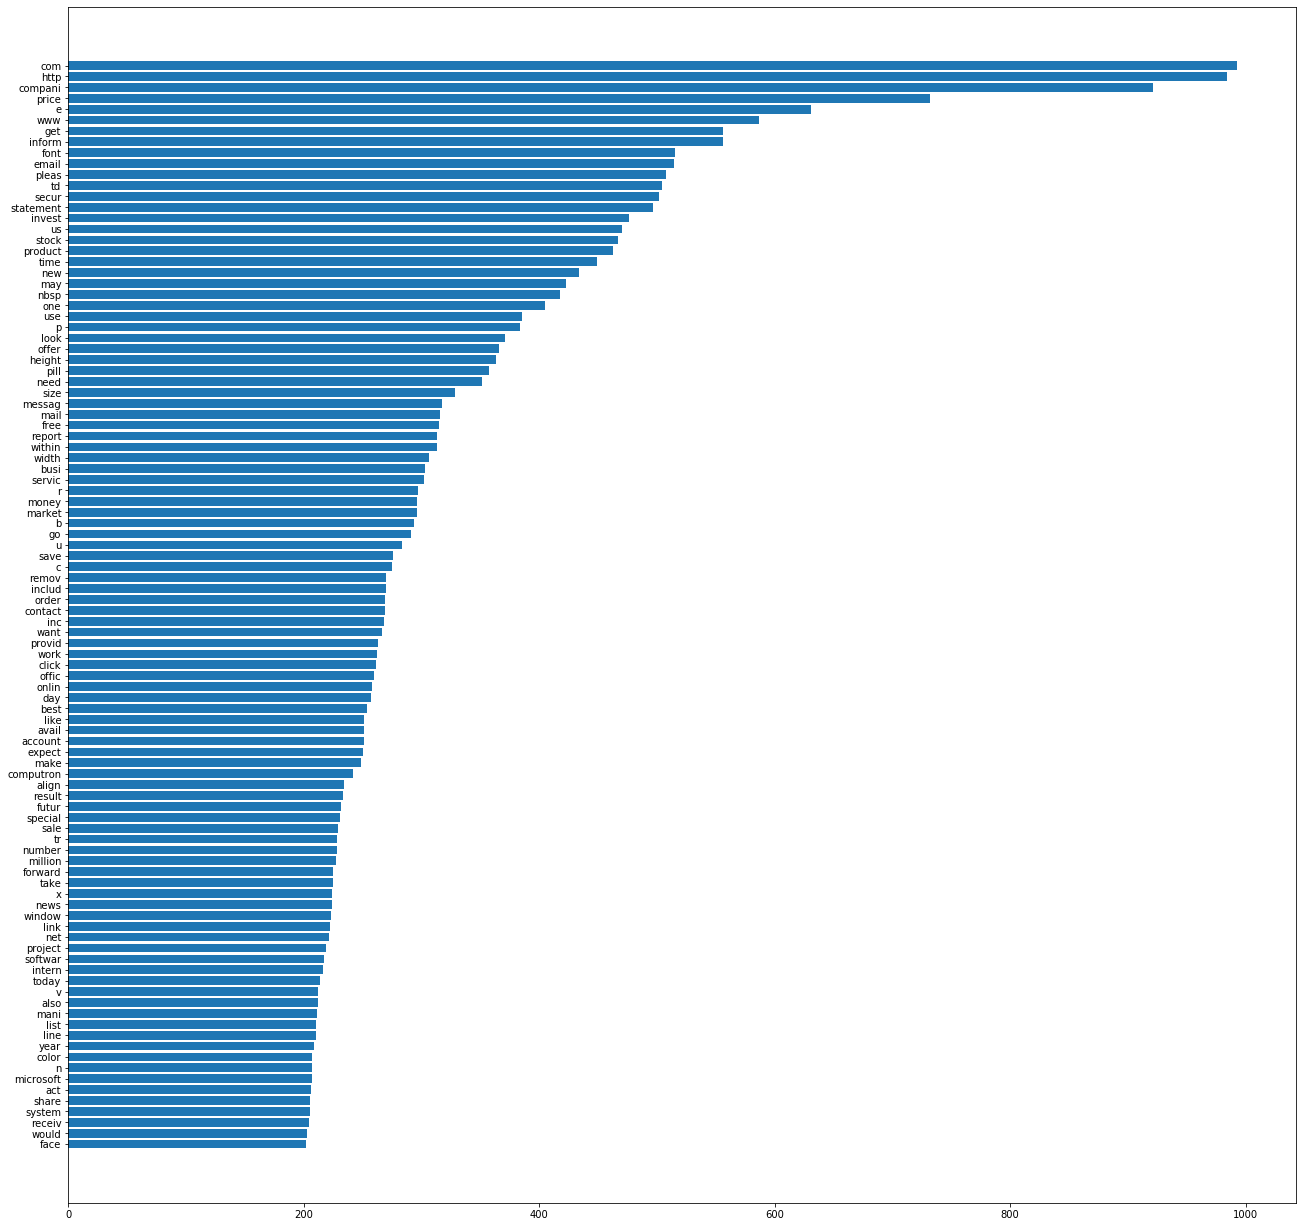

In [170]:

plt.subplots(figsize=(22,22))

plt.barh(df_spam[0],df_spam[1])

<BarContainer object of 100 artists>

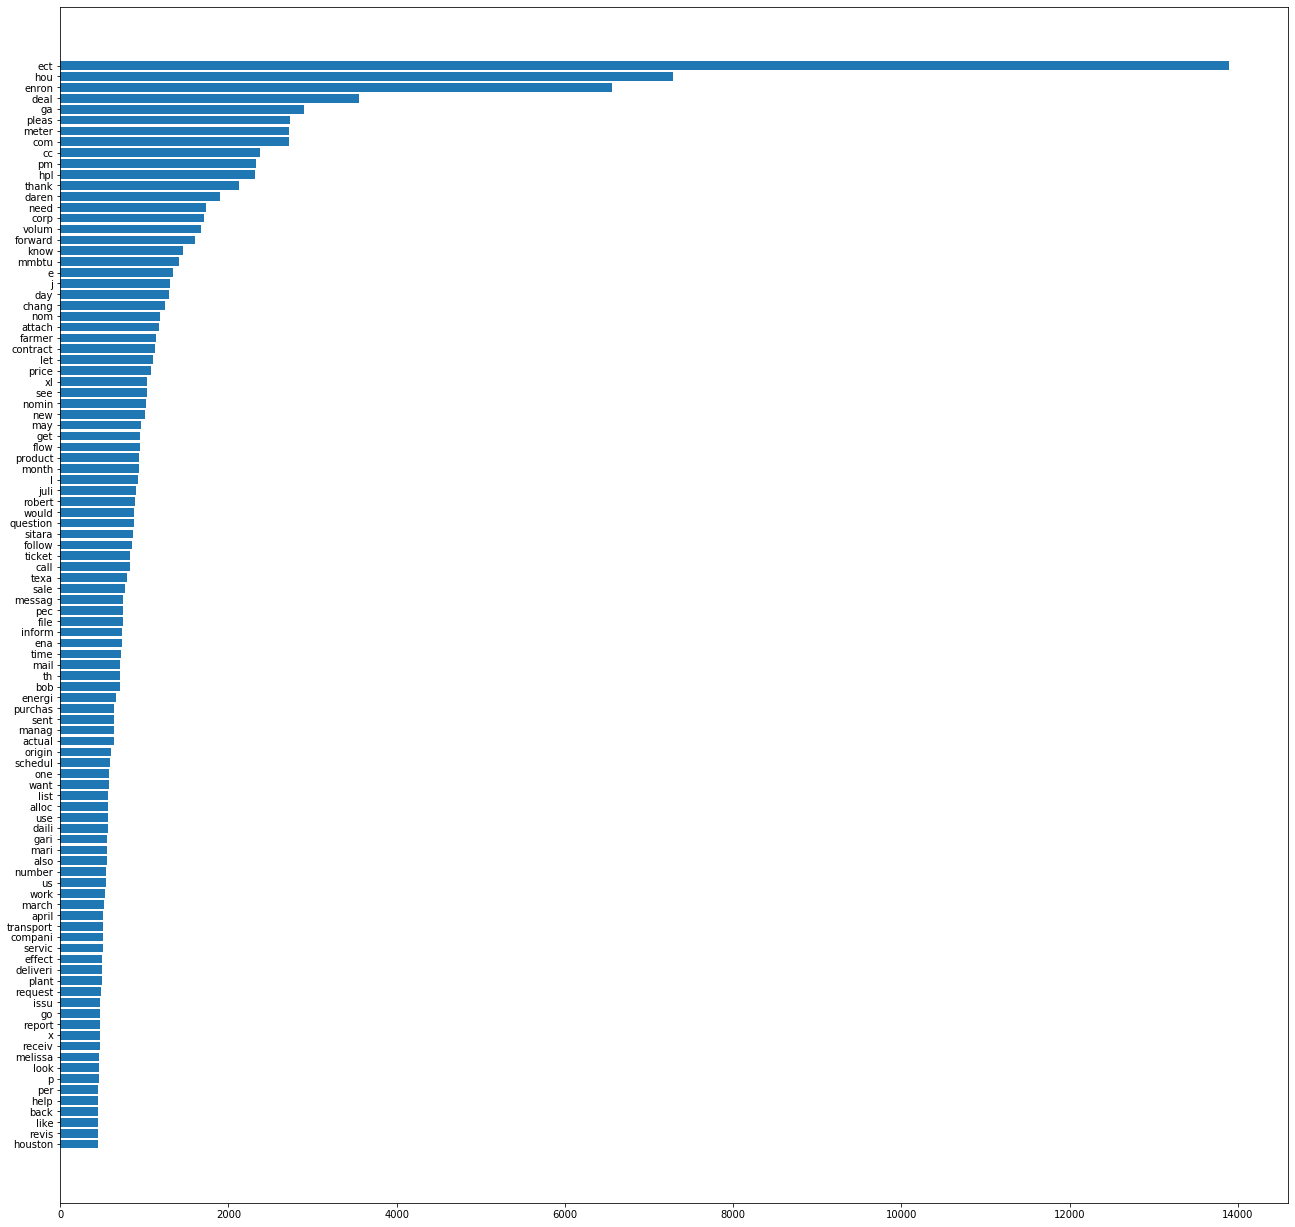

In [171]:

plt.subplots(figsize=(22,22))

plt.barh(df_ham[0],df_ham[1])

In [172]:
!pip install wordcloud

In [173]:
text=[]
for i in spam_text:
    text.append(i)
    

In [174]:
text_ham=[]
for i in ham_text:
    text_ham.append(i)
    

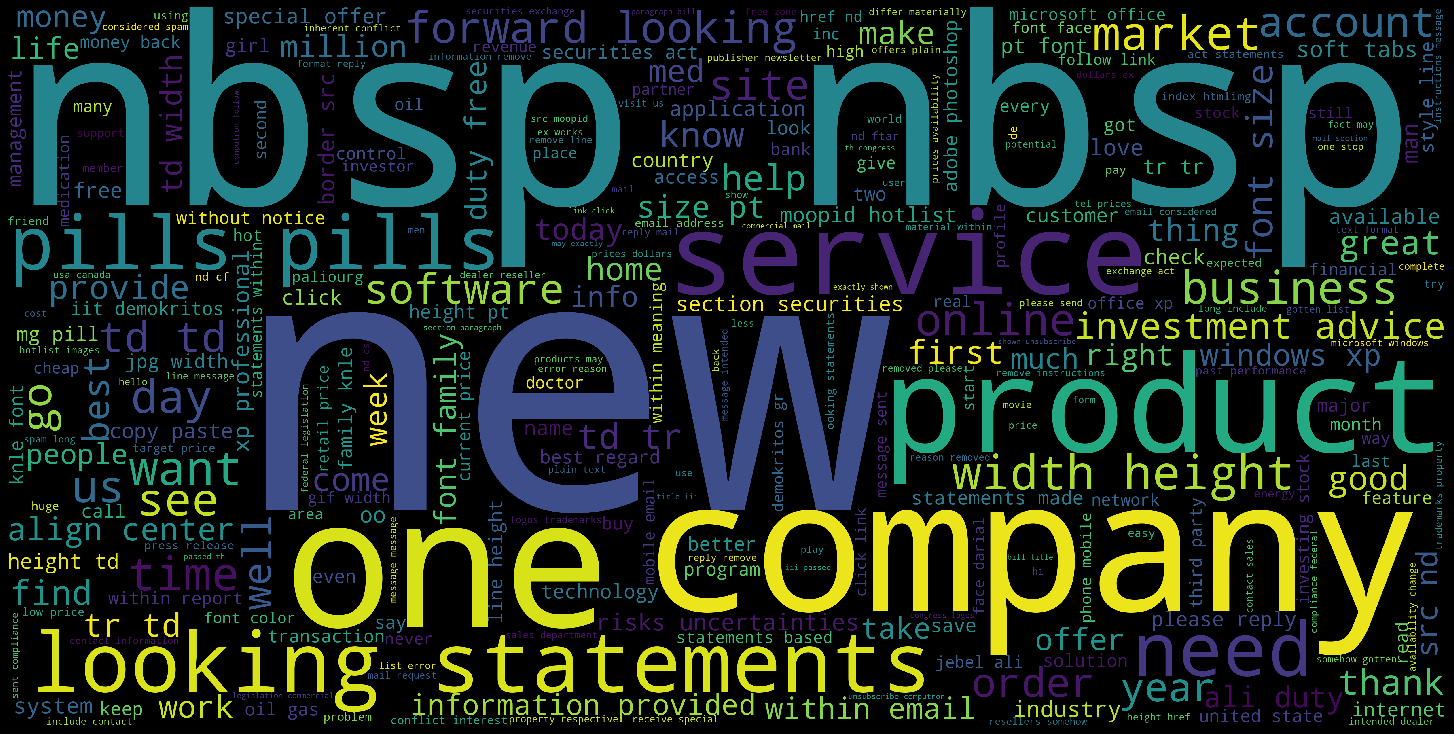

In [175]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=5000, height=2500,max_words=300)
wordcloud.generate(str(text))
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

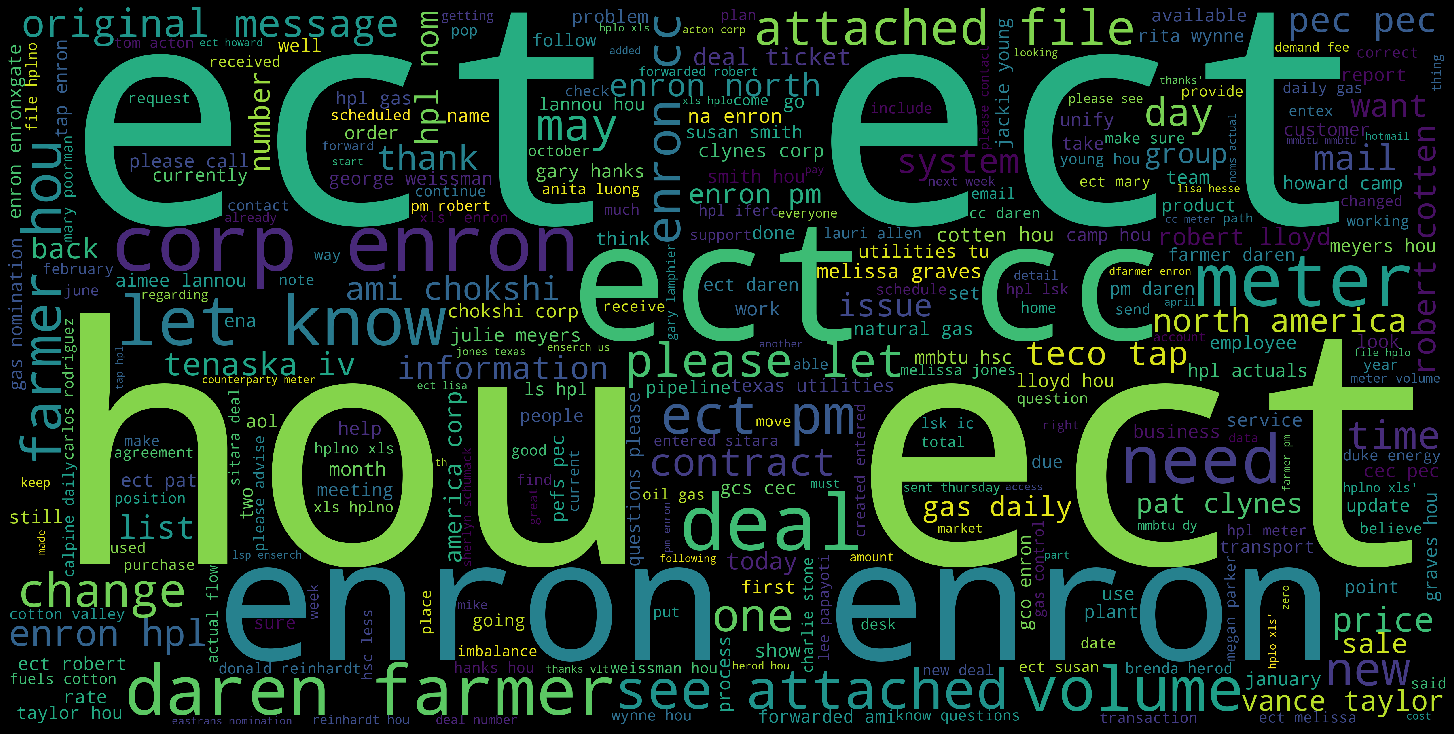

In [176]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=5000, height=2500,max_words=300)
wordcloud.generate(str(text_ham))
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [62]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))


Number of words: 37967
Most common words: [('ect', 13908), ('hou', 7289), ('enron', 6555), ('com', 3710), ('deal', 3655), ('pleas', 3245), ('ga', 3072), ('meter', 2721), ('cc', 2391), ('pm', 2343), ('hpl', 2318), ('thank', 2305), ('need', 2081), ('e', 1969), ('daren', 1901)]


In [63]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [64]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(message_cleaned[0])
for key, value in features.items():
    if value == True:
        print(key)

bodi
human
one
read
product
unsubscrib
time
energi


In [65]:
# Now lets do it for all the messages
messages = list(zip(message_cleaned, Y))
#test_data = list(zip(test_inputs, te_d[1]))

In [66]:
messages

[('nation associ honesti medicin stemcaoiwz bodi mani cri water dr f batmanghelidj titl multi nation book say bodi mani cri water found mani bookstor amazon com view expos scheme tactic govern pharmaceut industri keep human be sick care system tactic perpetu one diseas state bodili condit anoth effort fund mega industri suck discov natur substanc make phenomen differ health well read bodi mani cri water isbn written dr f batmanghelidj sincer nation associ honesti medicin preced advertis sent virtu particip special product offer e mail network servic partner unsubscrib receiv email e mail network servic special product offer pleas click',
  1),
 ('team room forward ami chokshi corp enron pm mari ellenberg pm ami chokshi corp enron enron stephani sever hou ect ect kelli steven hou ect ect martin cuilla hou ect ect katherin l kelli hou ect ect cc mari ellenberg corp enron enron nelson ferri corp enron enron cc team room pleas make note room chang monday devon price januari meet thank mse 

In [67]:


# define a seed for reproducibility
seed = 1
np.random.seed = seed
np.random.shuffle(messages)

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]

In [68]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.30, random_state=seed)

In [69]:
total=len(training)+len(testing)

print("Training",round(len(training)/total*100),"% = ", len(training))
print("Testing",round(len(testing)/total*100),"% = ",len(testing))

Training 70 % =  3620
Testing 30 % =  1552


### 4. Scikit-Learn Classifiers with NLTK

Now that we have our dataset, we can start building algorithms! Let's start with a simple linear support vector classifier, then expand to other algorithms. We'll need to import each algorithm we plan on using from sklearn.  We also need to import some performance metrics, such as accuracy_score and classification_report.

In [70]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 94.0721649484536


In [71]:
# make class label prediction for testing set
txt_features, labels = list(zip(*testing))

prediction = model.classify_many(txt_features)

In [72]:
# print a confusion matrix and a classification report

from sklearn.metrics import confusion_matrix

confunsion_matrix = pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

In [73]:
confunsion_matrix

predicted     
                  ham spam
actual ham       1034   71
       spam        21  426

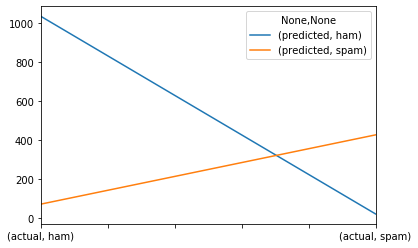

In [74]:
confunsion_matrix.plot()

In [75]:
confunsion_matrix.columns

MultiIndex(levels=[['predicted'], ['ham', 'spam']],
           codes=[[0, 0], [0, 1]])